# Modelling and Evaluation Notebook

## Objectives

- To address business requirement 2:
  - The client wants to know if a given image of a cherry leaf is healthy or shows powdery mildew.

## Inputs

This notebook will use the following inputs:

- inputs/cherry-leaves/cherry-leaves/test
- inputs/cherry-leaves/cherry-leaves/train
- inputs/cherry-leaves/cherry-leaves/validation
- outputs/v1/image_shape.pkl

## Outputs

This notebook will generate the following outputs:

- Images distribution plot in train, validation, and test set.
- Image augmentation.
- Class indices to change prediction inference in labels.
- Machine learning model creation and training.
- Saved model.
- Learning curve plot for model performance.
- Model evaluation on pickle file.
- Prediction on the random image file.

### Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib.image import imread
from PIL import Image

### Set Working Directory

First, Identify the current working directory...

In [2]:
current_dir = os.getcwd()  
print(f"📂 Current Directory: {current_dir}")

📂 Current Directory: /workspaces/milestone-project-mildew-detection-in-cherry-leaves/jupyter_notebooks


...then set the new working directory...

In [3]:
target_dir = "/workspaces/milestone-project-mildew-detection-in-cherry-leaves"  # Replace with your correct path
os.chdir(target_dir)
print(f"✅ Working Directory Set to:📂 {os.getcwd()}")

✅ Working Directory Set to:📂 /workspaces/milestone-project-mildew-detection-in-cherry-leaves


...and finally chack that the new working directory (current directory) matches the target_directory.

In [4]:
current_dir = os.getcwd()
print(f"📂 Current Directory: {current_dir}")

📂 Current Directory: /workspaces/milestone-project-mildew-detection-in-cherry-leaves


### Set input directories

We will now set the file paths for retrieving the image data from the train, test and validation folders.

In [5]:
image_data = "inputs/cherry-leaves/cherry-leaves"
train_path = os.path.join(image_data, "train")
val_path = os.path.join(image_data, "validation")
test_path = os.path.join(image_data, "test")

print(f"📂 Train Path: {train_path}")
print(f"📂 Validation Path: {val_path}")
print(f"📂 Test Path: {test_path}")

📂 Train Path: inputs/cherry-leaves/cherry-leaves/train
📂 Validation Path: inputs/cherry-leaves/cherry-leaves/validation
📂 Test Path: inputs/cherry-leaves/cherry-leaves/test


### Confrim the paths are valid

Run a fucntion to select and display one random image from each train, test and validation folder.This will confirm that the file paths are correct.

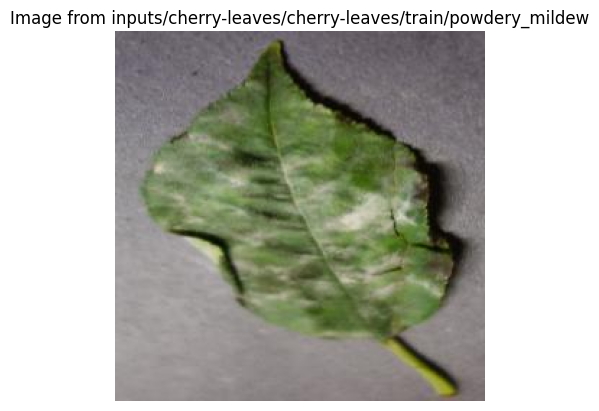

✅ Random train image: inputs/cherry-leaves/cherry-leaves/train/powdery_mildew/1ca9be51-dea4-4075-8907-e583f85254b2___FREC_Pwd.M 4850_flipLR.JPG


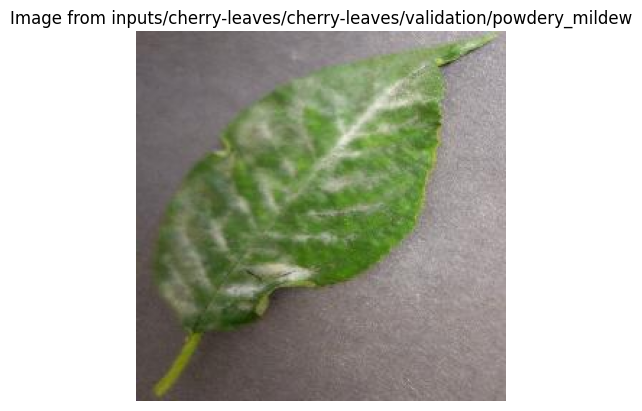

✅ Random validation image: inputs/cherry-leaves/cherry-leaves/validation/powdery_mildew/4b402153-97b6-4d4b-bb3e-b287349d7d41___FREC_Pwd.M 5025.JPG


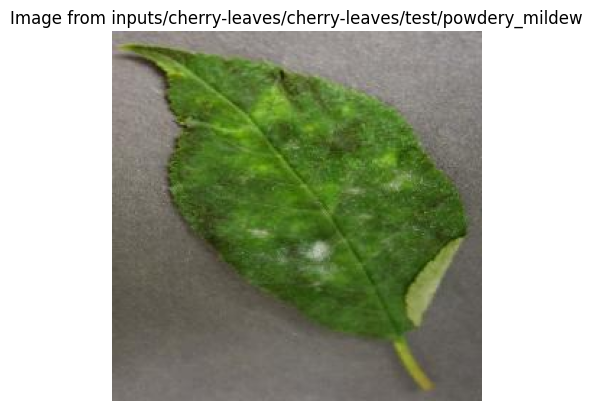

✅ Random test image: inputs/cherry-leaves/cherry-leaves/test/powdery_mildew/c7805b09-0ef0-4812-b3ea-d56280b1a4b3___FREC_Pwd.M 4898_flipLR.JPG


In [6]:

# Define paths correctly
image_data = "inputs/cherry-leaves/cherry-leaves"
train_path = os.path.join(image_data, "train")
val_path = os.path.join(image_data, "validation")
test_path = os.path.join(image_data, "test")

# Function to find and display a random image from subfolders
def show_random_image(parent_folder):
    """
    Selects and displays a random image from a subfolder inside the given parent directory.

    Args:
        parent_folder (str): The path to the main dataset folder (e.g., train, validation, test).

    Returns:
        str or None: The full path to the randomly selected image, or None if no images are found.
    """

    # Ensure the parent folder exists
    if not os.path.exists(parent_folder):
        print(f"❌ Path does not exist: {parent_folder}")
        return None

    # Scan subdirectories ("healthy", "powdery_mildew")
    subfolders = [os.path.join(parent_folder, subdir) for subdir in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, subdir))]

    if not subfolders:
        print(f"⚠️ No subfolders found in: {parent_folder}")
        return None

    # Pick a random subfolder
    chosen_folder = random.choice(subfolders)

    # Find image files inside that subfolder
    images = [f for f in os.listdir(chosen_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.webp'))]

    if not images:
        print(f"⚠️ No images found in: {chosen_folder}")
        return None

    # Select a random image and display it
    image_path = os.path.join(chosen_folder, random.choice(images))
    image = Image.open(image_path)

    plt.imshow(image)
    plt.title(f"Image from {chosen_folder}")
    plt.axis("off")  # Hide axes for a cleaner look
    plt.show()

    return image_path  # Return path for confirmation

# Fetch and display random images from each dataset section
train_image = show_random_image(train_path)
print(f"✅ Random train image: {train_image}")
val_image = show_random_image(val_path)
print(f"✅ Random validation image: {val_image}")
test_image = show_random_image(test_path)
print(f"✅ Random test image: {test_image}")


### Set output directories

Create 📂 'output' directory if it doesn't already exist.

In [7]:
# Define the version of the output directory
version = 'v1'
current_dir = os.getcwd()  # Get the current working directory

# Construct the full path for the versioned output folder
file_path = os.path.join(current_dir, 'outputs', version)

# Check if the directory for this version already exists
if os.path.exists(file_path):
    print(f'⚠️ Old version "{version}" already exists and the file path to it has just been set.') 
    print(f'Create a new version if required. If not, you are good to go!👍')
else:
    try:
        # Create the directory if it doesn't exist, `exist_ok=True` prevents errors if it already exists
        os.makedirs(file_path, exist_ok=True)
        print(f'✅ Created new directory:📂 {file_path}')
    except OSError as e:
        # Print an error message if directory creation fails
        print(f'❌ Error creating directory: {e}')

⚠️ Old version "v1" already exists and the file path to it has just been set.
Create a new version if required. If not, you are good to go!👍


### Set labels 

Labels should be 'healthy' and 'powdery_mildew'.

In [8]:
# Set the labels
labels = os.listdir(train_path)
print('🏷️ The labels for the images are', labels)

🏷️ The labels for the images are ['healthy', 'powdery_mildew']
